## 1-Overview

### 1.1 Project Description

I am preparing a prototype of a machine learning model for Zyfra, a company that develops efficiency solutions for heavy industry. The model will predict the amount of gold recovered from gold ore using data on extraction and purification.

### 1.2 Task

1. Prepare the data.
2. Perform data analysis.
3. Develop and train a model.

## 2-Initialization

### 2.1 Add imports

Imports in Jupyter notebooks allow users to access external libraries for extended functionality and facilitate code organization by declaring dependencies at the beginning of the notebook, ensuring clear and efficient development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

1. **Pandas**: is a Python library used for data manipulation and analysis, offering powerful data structures and operations for working with structured data.
2. **Sklearn**: is a Python library for machine learning that provides tools for data mining, data analysis, and machine learning algorithms, built on NumPy, SciPy, and matplotlib.
3. **Numpy**: is a Python library used for efficient numerical computing, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
4. **Matplotlib**: is a plotting library for Python that enables the creation of static, animated, and interactive visualizations, providing a wide range of plotting options and customization.

### 2.2 Set up CSV DataFrames

In my Jupyter notebook, I use Pandas to load CSV files, enabling me to manipulate and analyze data seamlessly within the notebook environment.

In [2]:
paths = {
    'local': './datasets/gold_recovery_{}.csv',
    'server': '/datasets/gold_recovery_{}.csv',
    'online': '',
}

I define the `load_csv` function to load a dataset specified by the argument `local`. First, I attempt to read it locally from `local[file_key]`, handling a `FileNotFoundError` by trying to read from `server[file_key]` if necessary, and finally, from `online[file_key]` if all else fails.

In [3]:
# Load CSV with fallback
def load_csv(name, source='local'):
    try:
        return pd.read_csv(paths[source].format(name))
    except FileNotFoundError:
        return pd.read_csv(paths['server'].format(name)) # if source == 'local' else pd.read_csv(paths['online'].format(name))

I define the `load_csv` function to load a dataset specified by the argument `local`. First, I attempt to read it locally from `local[file_key]`, handling a `FileNotFoundError` by trying to read from `server[file_key]` if necessary, and finally, from `online[file_key]` if all else fails.

In [4]:
full = load_csv('full')
test = load_csv('test')
train = load_csv('train')

The three CSV files (`full`, `test`, and `train`) have been loaded into separate variables (`full`, `test`, and `train`) using the `load_csv` function.

### 2.3 Display

The following code snippet will be used to display the first few rows of each DataFrames (`full`, `test`, and `train`) in a tabular format. 

This helps in quickly inspecting the initial data in each DataFrame.

In [5]:
display(full.head(), test.head(), train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


The dataframes are quite large. Features are named as follows:

`[stage].[parameter_type].[parameter_name]`

Example: `rougher.input.feed_ag`

**Stage values:**
- `rougher` — flotation
- `primary_cleaner` — primary purification
- `secondary_cleaner` — secondary purification
- `final` — final characteristics

**Parameter type values:**
- `input` — raw material parameters
- `output` — product parameters
- `state` — current stage characteristics
- `calculation` — calculation details

## 3 Preparing the Data

### 3.1 The Focus

Since there are many rows, we need to identify which ones are necessary to avoid extra or unnecessary work.

In [6]:
check_columns = full.columns
check_columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Both `full` and `train` have the same columns, so I displayed the list of columns from `full`.

In [7]:
FOCUS = ['rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 
         'rougher.input.feed_ag', 'rougher.output.tail_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
         'rougher.input.feed_pb', 'rougher.output.tail_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
         'rougher.input.feed_size', 'rougher.output.recovery', 'final.output.recovery']

After reviewing all the columns and Zyfra’s model requirements, we identified key values for building and understanding the model:

- Metals like gold (Au), silver (Ag), and lead (Pb), indicated by their periodic table symbols.
- Initial values from the rougher input.
- Processing stages to monitor concentration changes.
- Feed sizes and recovery amounts.

Next, we need to compare the test data frame with the others, noting that it has fewer rows.

In [8]:
COMMON = list(set(FOCUS).intersection(test.columns))
COMMON

['rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_ag',
 'rougher.input.feed_size']

To simplify the process, I compared the focus with the test DataFrame to identify and keep the columns they have in common for consistency.

### 3.2 Set-up

To ensure repeatability and accuracy, I’ll create a function that minimizes code while effectively completing the task.

In [9]:
def check_missing(df):
    missing = df.isnull().sum().sum()
    if missing == 0:
        print('There are no missing values.')
    else:
        df = df.fillna(0)
        df = df[(df != 0).all(axis=1)]
        print(f'  - {missing} missing values resolved.') 
    return df

In the following section, all the columns in each DataFrame will have numerical data types.

This function checks for missing values. We assume that either the value wasn't recorded or there was none. Therefore, all missing values are replaced with `0`. Any row containing a `0` is then removed.

**Hindsight:** In the data analysis, `0` values cause several issues. They lead to irregularities in metal and recovery concentrations, which in turn affect the accuracy of sMAPE calculations. Additionally, these `0` values introduce errors when calculating both rougher and final concentration recoveries.

In [10]:
def check_duplicate(df):
    duplicates = df.duplicated().sum()
    if duplicates == 0:
        print('There are no duplicate rows.')
    elif (duplicates / len(df)) < 0.05:
        print(f'  - {duplicates} duplicate rows removed.')
        df = df.drop_duplicates()
    else:
        print(f"Found {duplicates} duplicate rows that may require review.")
    return df

This function checks for duplicate values. If duplicates make up less than 5% of the data, they are dropped, as this is an acceptable threshold. If duplicates exceed 5%, the function will prompt me to review the DataFrame more closely.

In [11]:
def check_df(df):
    print('Data cleaning complete:')
    df = check_missing(df)
    df = check_duplicate(df)
    return df   

This function does three things:  
1. Combines the check_missing() and check_duplicate() functions,  
2. Reduces the amount of code,  
3. Improves the visual presentation of the output.

### 3.3 Processing `full`

I will now proceed to examine the `region_0` data frame.

In [12]:
filtered_full = full[FOCUS]
filtered_full

,rougher.input.feed_au,rougher.output.tail_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,rougher.input.feed_ag,rougher.output.tail_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.input.feed_pb,rougher.output.tail_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb,rougher.input.feed_size,rougher.output.recovery,final.output.recovery
0,6.486150,1.170244,19.793808,34.174427,42.192020,6.100378,5.008018,11.500771,8.547551,6.055403,2.284912,0.508728,7.101074,10.389648,9.889648,55.486599,87.107763,70.541216
1,6.478583,1.184827,20.050975,34.118526,42.701629,6.161113,4.955378,11.615865,8.558743,6.029369,2.266033,0.536689,7.278807,10.497069,9.968944,57.278666,86.843261,69.266198
2,6.362222,1.162562,19.737170,33.969464,42.657501,6.116455,4.843460,11.695753,8.603505,6.055926,2.159622,0.546416,7.216833,10.354494,10.213995,57.510649,86.842308,68.116445
3,6.118189,1.079755,19.320810,28.260743,42.689819,6.043309,4.655288,11.915047,7.221879,6.047977,2.037807,0.542525,7.175616,8.496563,9.977019,57.792734,87.226430,68.347543
4,5.663707,1.012642,19.216101,33.044932,42.774141,6.060915,4.552800,12.411054,9.089428,6.148599,1.786875,0.515438,7.240205,9.986786,10.142511,56.047189,86.688794,66.927016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,5.335862,0.748633,18.603550,32.940215,46.713954,6.091855,4.207261,11.124896,6.559174,3.224920,4.617558,0.612935,10.984003,12.445966,11.356233,85.718304,89.574376,73.755150
22712,4.838619,0.771582,18.441436,32.925325,46.866780,6.121323,4.177943,11.425983,6.612376,3.195978,4.144989,0.650557,10.888213,12.623947,11.349355,119.499241,87.724007,69.049291
22713,4.525061,0.685059,15.111231,31.856742,46.795691,5.970515,4.050010,8.523497,7.128896,3.109998,4.020002,0.636095,8.955135,12.633558,11.434366,122.262690,88.890579,67.002189
22714,4.362781,0.567130,17.834772,30.770892,46.408188,6.048130,3.902494,11.658799,7.490444,3.367241,3.902537,0.625609,10.655377,12.012378,11.625587,123.742430,89.858126,65.523246


This creates a new DataFrame called `filtered_full` by selecting only the columns specified in the `FOCUS` list from the existing DataFrame `full`. As cab be seen, the resulting `filtered_full` DataFrame contains only the data from the columns listed in `FOCUS`.

In [13]:
filtered_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_au                  22617 non-null  float64
 1   rougher.output.tail_au                 19980 non-null  float64
 2   rougher.output.concentrate_au          22618 non-null  float64
 3   primary_cleaner.output.concentrate_au  22618 non-null  float64
 4   final.output.concentrate_au            22630 non-null  float64
 5   rougher.input.feed_ag                  22618 non-null  float64
 6   rougher.output.tail_ag                 19979 non-null  float64
 7   rougher.output.concentrate_ag          22618 non-null  float64
 8   primary_cleaner.output.concentrate_ag  22618 non-null  float64
 9   final.output.concentrate_ag            22627 non-null  float64
 10  rougher.input.feed_pb                  22472 non-null  float64
 11  ro

All data types are correct and appropriately formatted for analysis.

In [14]:
filtered_full = check_df(filtered_full)

Data cleaning complete:
  - 12733 missing values resolved.
There are no duplicate rows.


It was observed that `12,733` missing values were addressed, and no duplicate values were found.

### 3.4 Processing `test`

I will now proceed to examine the `region_0` data frame.

In [15]:
filtered_test = test[COMMON]
filtered_test

,rougher.input.feed_au,rougher.input.feed_pb,rougher.input.feed_ag,rougher.input.feed_size
0,12.084103,5.636710,13.128569,62.710452
1,11.918977,5.526065,13.036280,61.961163
2,12.091332,5.426561,13.138412,66.903807
3,12.181597,5.114758,12.400507,59.865919
4,11.290425,4.767383,11.327427,63.315324
...,...,...,...,...
5851,10.554544,4.695306,11.638973,66.758479
5852,10.254051,4.478381,11.338091,62.560684
5853,10.169094,4.405327,11.285908,73.647513
5854,10.071156,4.343488,11.289710,78.066446


This creates a new DataFrame called `filtered_test` by selecting only the columns specified in the `COMMON` list from the existing DataFrame `test`. As cab be seen, the resulting `filtered_test` DataFrame contains only the data from the columns listed in `COMMON`.

In [16]:
filtered_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.input.feed_au    5840 non-null   float64
 1   rougher.input.feed_pb    5840 non-null   float64
 2   rougher.input.feed_ag    5840 non-null   float64
 3   rougher.input.feed_size  5834 non-null   float64
dtypes: float64(4)
memory usage: 183.1 KB


All data types are correct and appropriately formatted for analysis.

In [17]:
filtered_test = check_df(filtered_test)

Data cleaning complete:
  - 70 missing values resolved.
There are no duplicate rows.


It was observed that `70` missing values were addressed, and no duplicate values were found.

### 3.5 Processing `train`

I will now proceed to examine the `region_0` data frame.

In [18]:
filtered_train = train[FOCUS]
filtered_train

,rougher.input.feed_au,rougher.output.tail_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,rougher.input.feed_ag,rougher.output.tail_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.input.feed_pb,rougher.output.tail_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb,rougher.input.feed_size,rougher.output.recovery,final.output.recovery
0,6.486150,1.170244,19.793808,34.174427,42.192020,6.100378,5.008018,11.500771,8.547551,6.055403,2.284912,0.508728,7.101074,10.389648,9.889648,55.486599,87.107763,70.541216
1,6.478583,1.184827,20.050975,34.118526,42.701629,6.161113,4.955378,11.615865,8.558743,6.029369,2.266033,0.536689,7.278807,10.497069,9.968944,57.278666,86.843261,69.266198
2,6.362222,1.162562,19.737170,33.969464,42.657501,6.116455,4.843460,11.695753,8.603505,6.055926,2.159622,0.546416,7.216833,10.354494,10.213995,57.510649,86.842308,68.116445
3,6.118189,1.079755,19.320810,28.260743,42.689819,6.043309,4.655288,11.915047,7.221879,6.047977,2.037807,0.542525,7.175616,8.496563,9.977019,57.792734,87.226430,68.347543
4,5.663707,1.012642,19.216101,33.044932,42.774141,6.060915,4.552800,12.411054,9.089428,6.148599,1.786875,0.515438,7.240205,9.986786,10.142511,56.047189,86.688794,66.927016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,5.335862,0.748633,18.603550,32.940215,46.713954,6.091855,4.207261,11.124896,6.559174,3.224920,4.617558,0.612935,10.984003,12.445966,11.356233,85.718304,89.574376,73.755150
16856,4.838619,0.771582,18.441436,32.925325,46.866780,6.121323,4.177943,11.425983,6.612376,3.195978,4.144989,0.650557,10.888213,12.623947,11.349355,119.499241,87.724007,69.049291
16857,4.525061,0.685059,15.111231,31.856742,46.795691,5.970515,4.050010,8.523497,7.128896,3.109998,4.020002,0.636095,8.955135,12.633558,11.434366,122.262690,88.890579,67.002189
16858,4.362781,0.567130,17.834772,30.770892,46.408188,6.048130,3.902494,11.658799,7.490444,3.367241,3.902537,0.625609,10.655377,12.012378,11.625587,123.742430,89.858126,65.523246


This creates a new DataFrame called `filtered_train` by selecting only the columns specified in the `FOCUS` list from the existing DataFrame `train`. As cab be seen, the resulting `filtered_train` DataFrame contains only the data from the columns listed in `FOCUS`.

In [19]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_au                  16777 non-null  float64
 1   rougher.output.tail_au                 14611 non-null  float64
 2   rougher.output.concentrate_au          16778 non-null  float64
 3   primary_cleaner.output.concentrate_au  16778 non-null  float64
 4   final.output.concentrate_au            16789 non-null  float64
 5   rougher.input.feed_ag                  16778 non-null  float64
 6   rougher.output.tail_ag                 14610 non-null  float64
 7   rougher.output.concentrate_ag          16778 non-null  float64
 8   primary_cleaner.output.concentrate_ag  16778 non-null  float64
 9   final.output.concentrate_ag            16788 non-null  float64
 10  rougher.input.feed_pb                  16632 non-null  float64
 11  ro

All data types are correct and appropriately formatted for analysis.

In [20]:
filtered_train = check_df(filtered_train)

Data cleaning complete:
  - 10468 missing values resolved.
There are no duplicate rows.


It was observed that `10,468` missing values were addressed, and no duplicate values were found.

## 4 Data Analyze

### 4.1 Recovery Check

Now that the dataframes are fully processed, we can begin analyzing the data. Before diving deeper, I'll first check the consistency of the provided data.

In [21]:
def calculate_recovery(C, F, T):
    return (C * (F - T)) / (F * (C - T)) * 100

I created a function to calculate `rougher.output.recovery` to compare it with the values provided in the dataframes.

In [22]:
def mae_calculation(C, F, T, df):
    df['my_calc'] = calculate_recovery(C, F, T)
    mae = mean_absolute_error(df['rougher.output.recovery'], df['my_calc'])
    print(f'MAE between calculated and actual recovery: {mae:.2f}')

The `mae_calculation()` function runs `calculate_recovery()` to compute `rougher.output.recovery` and adds it as a new feature to `filtered_train`. Based on this calculation, I can then compare the difference between my values and those provided in the dataset.

In [23]:
mae_calculation(
    filtered_full['rougher.output.concentrate_au'], 
    filtered_full['rougher.input.feed_au'],
    filtered_full['rougher.output.tail_au'], 
    filtered_full
)
mae_calculation(
    filtered_train['rougher.output.concentrate_au'],
    filtered_train['rougher.input.feed_au'],
    filtered_train['rougher.output.tail_au'], 
    filtered_train
)

MAE between calculated and actual recovery: 0.00
MAE between calculated and actual recovery: 0.00


Running `mae_calculation()` on both the `filtered_full` and `filtered_train` dataframes confirmed that there is no significant variation between the calculated values and those provided in the dataset.

### 4.2 Metal Concentration

Now that we've verified the accuracy of the data, the next step is to analyze the metals and observe how their concentrations change throughout the process.

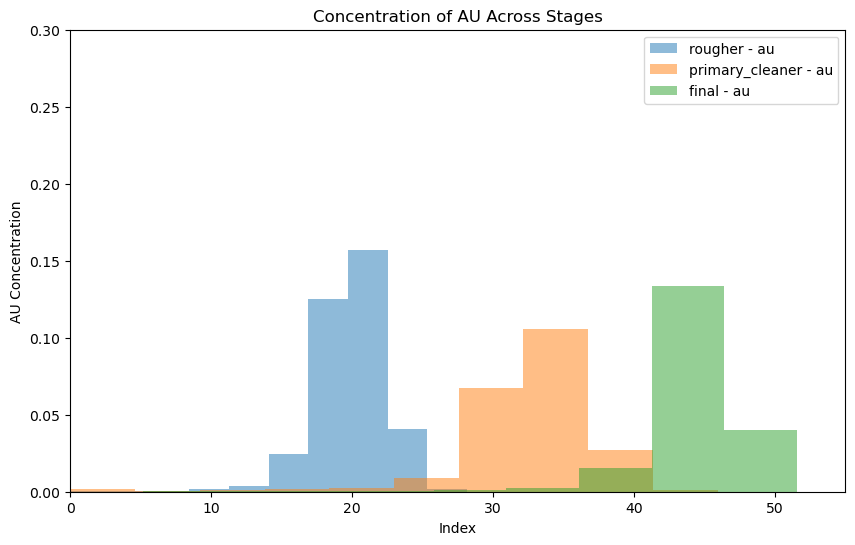

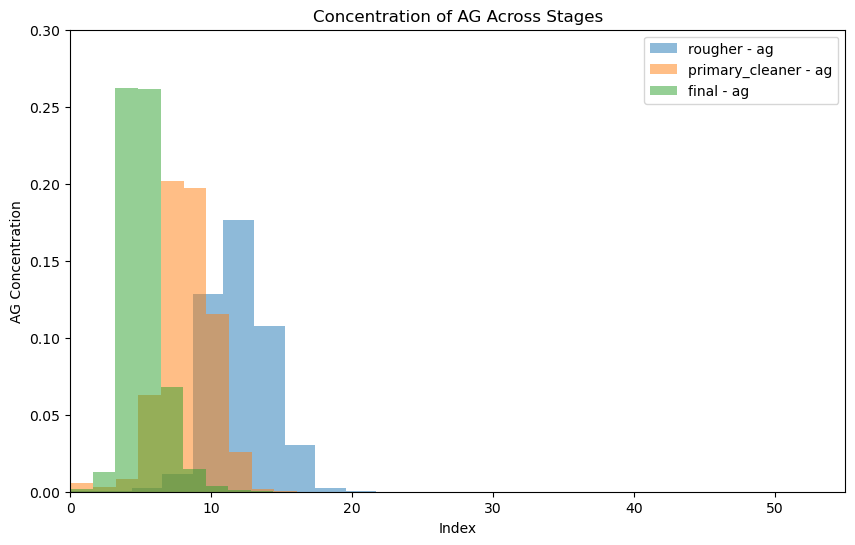

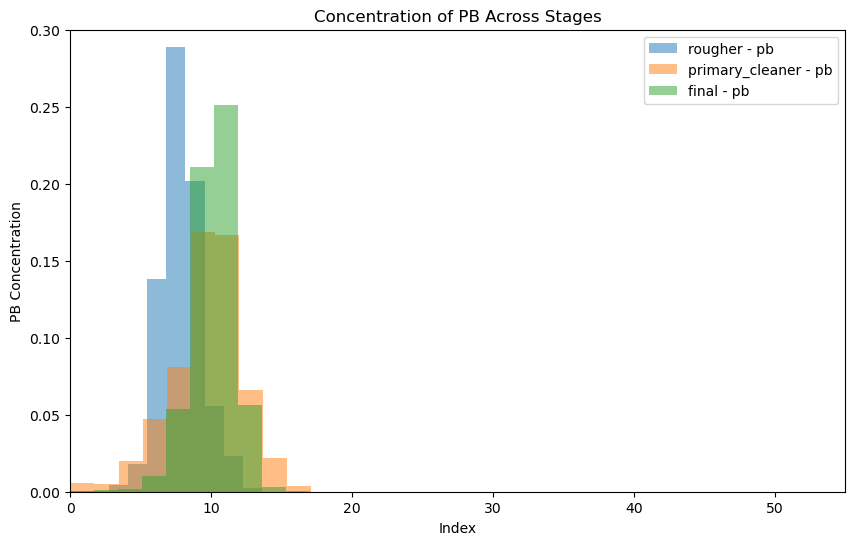

In [24]:
stages = ['rougher', 'primary_cleaner', 'final']

for metal in ['au', 'ag', 'pb']:
    plt.figure(figsize=(10, 6))
    for stage in stages:
        column_name = f'{stage}.output.concentrate_{metal}'
        if column_name in filtered_train.columns:
            plt.hist(
                filtered_train[column_name], 
                label=f'{stage} - {metal}',
                alpha=0.5,
                density=True
            )
            
    plt.title(f'Concentration of {metal.upper()} Across Stages')
    plt.xlabel('Index')
    plt.ylabel(f'{metal.upper()} Concentration')
    plt.xlim(0, 55)
    plt.ylim(0, 0.3)
    plt.legend()
    plt.show()

For gold (Au), the concentration increases as it undergoes further processing. In contrast, for silver (Ag), the concentration decreases as processing progresses. For lead (Pb), the concentration stabilizes between approximately 8 to 12 once processing starters.

### 4.3 Feed Comparison

I will now compare the `feed_size` between `filtered_full` and `filtered_train`, as it is likely that `feed_size` strongly correlates with the other values.

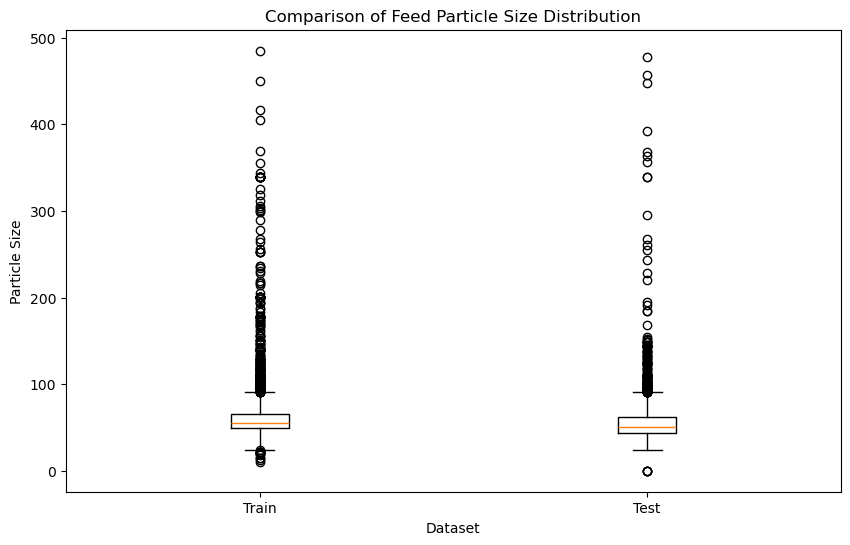

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [filtered_train['rougher.input.feed_size'], 
     filtered_test['rougher.input.feed_size']], 
     labels=['Train', 'Test'])
plt.title('Comparison of Feed Particle Size Distribution')
plt.xlabel('Dataset')
plt.ylabel('Particle Size')
plt.show()

When graphing the distribution of `filtered_full` and `filtered_train`, two observations are clear:
- There are numerous outliers across the data.
- All of the percentiles are well-aligned.

In [26]:
display(
    filtered_full['rougher.input.feed_size'].describe(), 
    filtered_train['rougher.input.feed_size'].describe()
)

count    18510.000000
mean        58.940664
std         21.303264
min          0.046369
25%         47.468264
50%         54.676861
75%         64.930270
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    13407.000000
mean        60.097752
std         22.287967
min          9.659576
25%         49.013512
50%         55.415773
75%         65.924009
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Comparing summary statistics such as mean, median, and standard deviation provides further clarity, showing minimal differences in `feed_size` between `filtered_full` and `filtered_train`. The only notable variation is in the minimum values, which show the greatest difference, but this difference is small when compared to the maximum values.

### 4.4 Total Concentration Stages

The final aspect of the data to analyze is the processing stages of the metals.

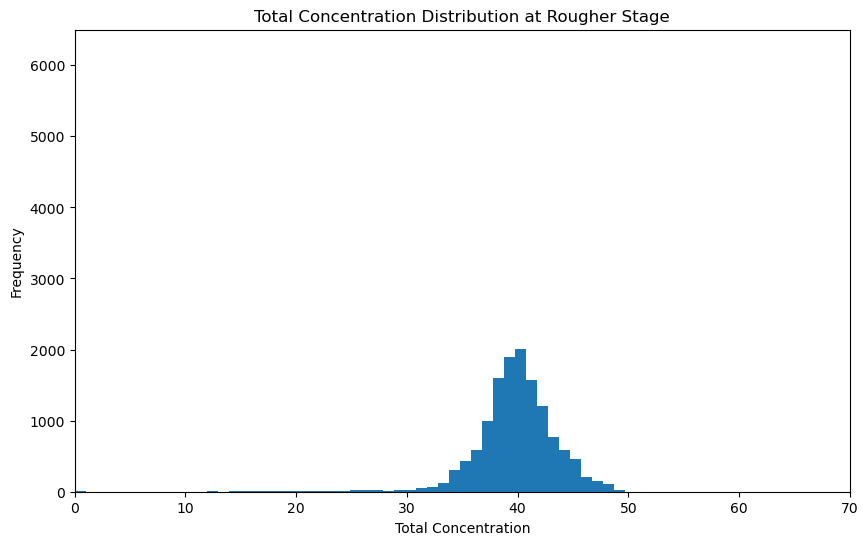

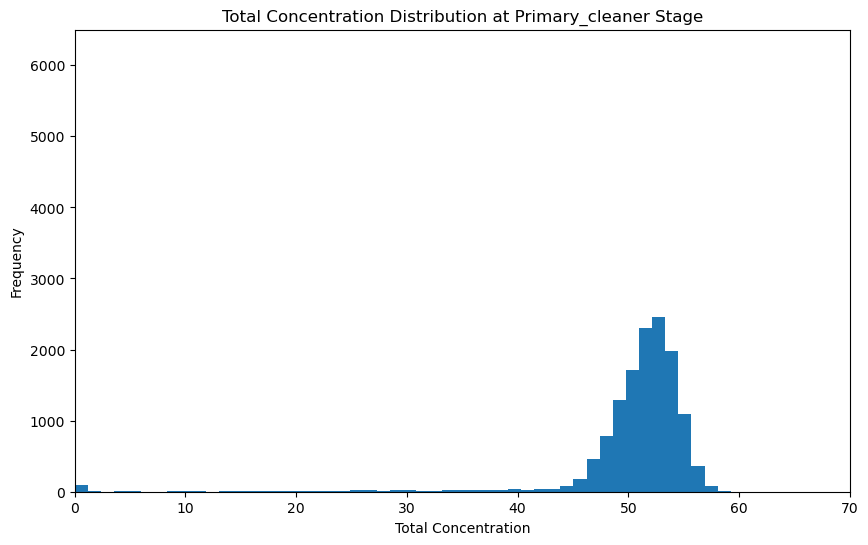

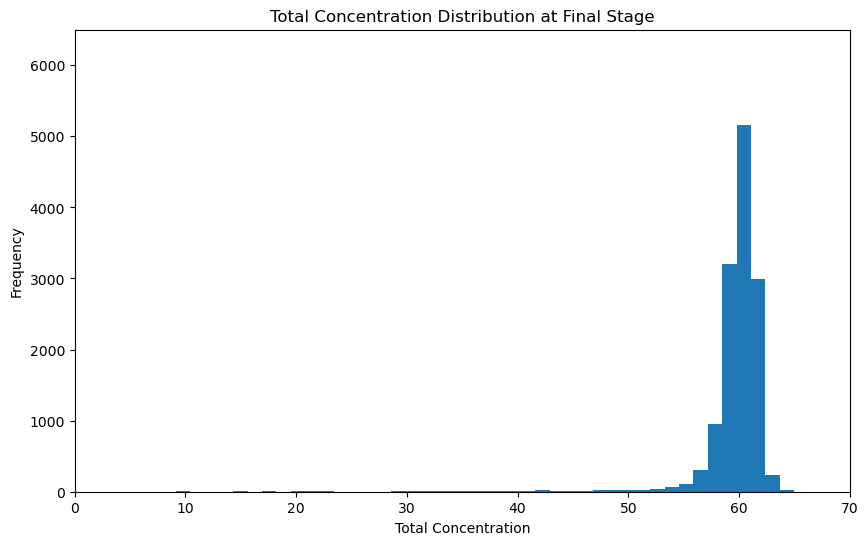

In [27]:
for stage in stages:
    total_concentration = (filtered_train[f'{stage}.output.concentrate_au'] +
                           filtered_train[f'{stage}.output.concentrate_ag'] +
                           filtered_train[f'{stage}.output.concentrate_pb'])
    
    plt.figure(figsize=(10, 6))
    plt.hist(total_concentration, bins=50)
    plt.title(f'Total Concentration Distribution at {stage.capitalize()} Stage')
    plt.xlabel('Total Concentration')
    plt.ylabel('Frequency')
    plt.xlim(0, 70)
    plt.ylim(0, 6500)
    plt.show()

When graphing the concentration at each stage, it is clear that as metals are processed further, their concentration increases and deviation from the average decreases. Based on the graph, fully processed gold should typically have a concentration of around 60.

## 5 Model Building

### 5.1 Set-up

To ensure repeatability and accuracy, I’ll create a function that minimizes code while effectively completing the task.

In [28]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)), axis=0)

I define the `smape` function to calculate the symmetric Mean Absolute Percentage Error (sMAPE) between actual (`y_true`) and predicted (`y_pred`) values. It returns the percentage error by averaging the relative absolute differences between the two sets of values, multiplied by 100.

These models will be evaluated using key features from `feature` and then evaluated to ensure reliable performance in predicting recovery rates.

In [29]:
def final_smape(r, f):
    return 0.25 * r + 0.75 * f

I define the `final_smape` function to calculate a weighted sMAPE score by combining the rougher stage sMAPE and final stage sMAPE.

### 5.2 Set Models

In this section, we focus on training machine learning models to predict the rougher and final recovery stages of the gold extraction process. We utilize decision trees, random forests, and linear regression models, with separate predictors for both rougher and final output recovery. 

In [30]:
features = filtered_train[COMMON]
target_rougher = filtered_train['rougher.output.recovery']
target_final = filtered_train['final.output.recovery']

These models will be evaluated using key features from `feature` and then evaluated to ensure reliable performance in predicting recovery rates.

In [31]:
decision_tree_rougher = DecisionTreeRegressor(random_state=42)
decision_tree_final = DecisionTreeRegressor(random_state=42)

I initialize two decision tree regressors using `DecisionTreeRegressor`. The first model, `decision_tree_rougher`, is for predictions in the rougher stage, and the second model, `decision_tree_final`, is for the final stage. Both are set with `random_state=42` to ensure consistent results across runs.

In [32]:
random_forest_rougher = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_final = RandomForestRegressor(n_estimators=100, random_state=42)

I create two random forest models using `RandomForestRegressor`. The first model, `random_forest_rougher`, is designed for predictions in the rougher stage, while the second, `random_forest_final`, is for the final stage. Both models are configured with 100 trees (`n_estimators=100`) and a `random_state` of 42 for reproducibility.

In [33]:
linear_regression_rougher = LinearRegression()
linear_regression_final = LinearRegression()

I set up two linear regression models using `LinearRegression`. The first model, `linear_regression_rougher`, is intended for the rougher stage predictions, and the second model, `linear_regression_final`, is for the final stage. Both models use default settings.

### 5.3 Model Evaluating   

In this section, we assess the performance of various models through cross-validation to elevate our predictive capabilities. We evaluate Decision Tree, Random Forest, and Linear Regression algorithms on both the rougher and final stages using K-Fold cross-validation. 

In [34]:
n_folds = 5
cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

I define a cross-validation setup using `KFold` with 5 folds. The `cv` object is configured to shuffle the data before splitting and uses a `random_state` of 42 to ensure reproducibility.

In [35]:
dt_rougher_cv_scores = cross_val_score(decision_tree_rougher, features, target_rougher, cv=cv)
dt_final_cv_scores = cross_val_score(decision_tree_final, features, target_final, cv=cv)

print(f'Decision Tree Rougher score: {dt_rougher_cv_scores.mean():.2f}')
print(f'Decision Tree Final score: {dt_final_cv_scores.mean():.2f}')

Decision Tree Rougher score: 0.14
Decision Tree Final score: -0.18


The Decision Tree model for the rougher stage has a score of 0.11, showing some performance. In contrast, the model for the final stage has a score of -0.17, indicating poor performance, especially compared to the rougher stage.

In [36]:
rf_rougher_cv_scores = cross_val_score(random_forest_rougher, features, target_rougher, cv=cv)
rf_final_cv_scores = cross_val_score(random_forest_final, features, target_final, cv=cv)

print(f'Random Forest Rougher score: {rf_rougher_cv_scores.mean():.2f}')
print(f'Random Forest Final score: {rf_final_cv_scores.mean():.2f}')

Random Forest Rougher score: 0.54
Random Forest Final score: 0.36


The Random Forest model for the rougher stage achieves a score of 0.54, reflecting strong performance. The Random Forest model for the final stage has a score of 0.36, which is lower but still indicates decent performance compared to the rougher stage.

Overall this is much better than the Decision Tree model.

In [37]:
lr_rougher_cv_scores = cross_val_score(linear_regression_rougher, features, target_rougher, cv=cv)
lr_final_cv_scores = cross_val_score(linear_regression_final, features, target_final, cv=cv)

print(f'Linear Regression Rougher score: {lr_rougher_cv_scores.mean():.2f}')
print(f'Linear Regression Final score: {lr_final_cv_scores.mean():.2f}')

Linear Regression Rougher score: 0.23
Linear Regression Final score: 0.12


The Linear Regression model for the rougher stage has a score of 0.23, indicating moderate performance. The model for the final stage has a score of 0.12, which is lower and aligns with the observations from the Decision Tree and Random Forest models.

In terms of performance, Linear Regression ranks second, with the Random Forest model clearly being the best.

### 5.4 Final Model

In this section, I will create the final model using Random Forest to predict gold recovery for both the rougher and final stages. The models will be trained on the `filtered_train` dataset and evaluated using the sMAPE metric, which is crucial for assessing prediction accuracy. The final results will include sMAPE scores for both stages, demonstrating the model's effectiveness in optimizing gold extraction processes.

In [38]:
filtered_recovery = pd.merge(filtered_full, filtered_test, on=COMMON, how='right')[['rougher.output.recovery', 'final.output.recovery']]

I merge the `filtered_full` and `filtered_test` DataFrames on the common columns specified by `COMMON`, using a right join to include all rows from `filtered_test`. Then, I select only the columns `rougher.output.recovery` and `final.output.recovery` from the merged DataFrame, resulting in the `filtered_recovery` DataFrame.

In [39]:
random_forest_rougher.fit(features, target_rougher)
random_forest_final.fit(features, target_final)

filtered_test['rougher.output.recovery'] = random_forest_rougher.predict(filtered_test[COMMON])
filtered_test['final.output.recovery'] = random_forest_final.predict(filtered_test[COMMON])

I train the `random_forest_rougher` model using `model_full` and `model_rougher`, and the `random_forest_final` model using `model_full` and `model_final`. I then use these trained models to make predictions on the `filtered_test` data. The predictions for the rougher stage are stored in the `predictions_rougher` variable, and those for the final stage are in `predictions_final`. I update the `filtered_test` DataFrame with these predictions, adding columns for `rougher.output.recovery` and `final.output.recovery`.



In [40]:
smape_rougher = smape(filtered_recovery['rougher.output.recovery'], filtered_test['rougher.output.recovery'])
smape_final = smape( filtered_recovery['final.output.recovery'], filtered_test['final.output.recovery'])

smape_result = final_smape(smape_rougher, smape_final)
print(f'SMAPE: {smape_result:.2f}%')

SMAPE: 8.34%


The SMAPE value is 8.33%, which indicates the average symmetric Mean Absolute Percentage Error of the predictions. This percentage reflects the model's accuracy in predicting the values, with a lower SMAPE representing better predictive performance.

## 6 Conclusion

In conclusion, the analysis of the predictive models for the rougher and final stages has yielded varying results. The Random Forest models performed best, with scores of 0.54 for the rougher stage and 0.36 for the final stage, indicating strong predictive capability. The overall SMAPE of 8.33% suggests that the predictions are reasonably accurate, though there is room for improvement. These findings highlight the effectiveness of Random Forests for this problem and provide a benchmark for further model refinement.